Objectives: To predict the flower species

DATA PREPROCESSING

Import libraries and dataset

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

Check dataset in seaborn and load iris

In [73]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [74]:
df=sns.load_dataset('iris')

Explore the data

In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
df.shape

(150, 5)

In [77]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [80]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [81]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: >

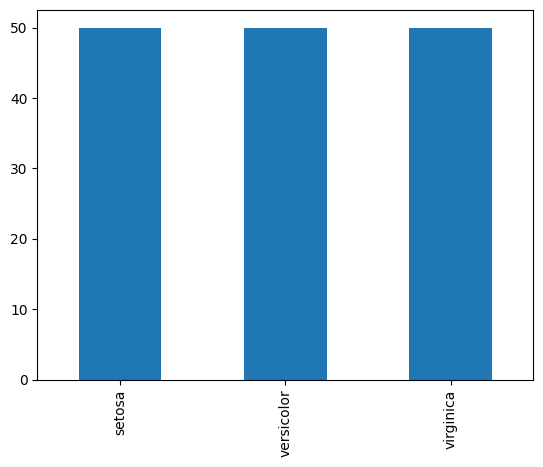

In [83]:
df['species'].value_counts().plot(kind='bar')

Get the target and features

In [84]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

Split the data into train and test

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Transform the data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
trans=StandardScaler()

In [89]:
X_train=trans.fit_transform(X_train)
X_test=trans.transform(X_test)

MODELLING

LOGISTIC REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lmodel=LogisticRegression()

In [92]:
lmodel.fit(X_train,y_train)

LogisticRegression()

Evaluate

In [93]:
y_test_pred=lmodel.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_pred,y_test)

0.9736842105263158

KTH NEAREST NEIGHBOURS

Build the model

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
kmodel=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [96]:
kmodel.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Evaluate

In [97]:
y_test_pred=kmodel.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_pred,y_test)

0.9736842105263158

NAIVE BAYES

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,CategoricalNB,ComplementNB

In [99]:
nmodel=GaussianNB() #Not depend on transformation

In [100]:
nmodel.fit(X_train,y_train)

GaussianNB()

Evaluate

In [101]:
y_test_pred=nmodel.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_pred,y_test)

1.0

DECISION TREE

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dmodel=DecisionTreeClassifier(criterion='gini',
                             max_depth=7,
                             min_samples_split=9,
                             random_state=10)

In [104]:
dmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=10)

Evaluate

In [105]:
y_test_pred=dmodel.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_pred,y_test)

0.9736842105263158

SUPPORT VECTOR MACHINE

In [106]:
from sklearn.svm import SVC

In [107]:
smodel=SVC(kernel='linear', C=0.5,random_state=5)

In [108]:
smodel.fit(X_train,y_train)

SVC(C=0.5, kernel='linear', random_state=5)

Evaluate

In [109]:
y_test_pred=smodel.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_pred,y_test)

0.9736842105263158

KERNEL SUPPORT VECTOR MACHINE

RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rmodel=RandomForestClassifier(criterion='gini',
                             max_depth=7,
                             min_samples_split=9,
                             random_state=5)

In [112]:
rmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=9, random_state=5)

Evaluate

In [113]:
y_test_pred=rmodel.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test_pred,y_test)

0.9736842105263158

EVALUATION

y_test_pred=model.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [115]:
accuracy_score(y_test_pred,y_test)

0.9736842105263158

In [116]:
cm=confusion_matrix(y_test_pred,y_test)
cm

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]])

In [ ]:
#pd.DataFrame(cm, columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])
